# 1. Preprocessing Datasets:

## A. Loading the dataset into a pandas DataFrame and some basic information.

In [54]:
import pandas as pd

try:
    df = pd.read_csv('C:/Learnings/Dataset.csv')
    print(df.info())
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'C:/Learnings/Dataset.csv' not found.")
    df = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           7043 non-null   object
 1   SeniorCitizen    7043 non-null   int64 
 2   Dependents       7043 non-null   object
 3   tenure           7043 non-null   int64 
 4   PhoneService     7043 non-null   object
 5   MultipleLines    7043 non-null   object
 6   InternetService  7043 non-null   object
 7   Contract         7043 non-null   object
 8   MonthlyCharges   7043 non-null   int64 
 9   Churn            7043 non-null   object
dtypes: int64(3), object(7)
memory usage: 550.4+ KB
None


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


(7043, 10)


Finding-The dataset has 7043 rows and 21 columns.

## B. Analysing data types, missing values, distributions, and descriptive statistics of the DataFrame.

In [58]:
# Analysing data types
print("Data Types:\n", df.dtypes)

# Checking for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Examining the distribution of numerical variables
numerical_features = df.select_dtypes(include=['number'])
print("\nDescriptive Statistics for Numerical Features:\n", numerical_features.describe())


# Examining the distribution of categorical variables
categorical_features = df.select_dtypes(include=['object'])
for column in categorical_features.columns:
    print(f"\nValue Counts for {column}:\n{df[column].value_counts()}")

# Computing the correlation matrix
correlation_matrix = numerical_features.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

Data Types:
 gender             object
SeniorCitizen       int64
Dependents         object
tenure              int64
PhoneService       object
MultipleLines      object
InternetService    object
Contract           object
MonthlyCharges      int64
Churn              object
dtype: object

Missing Values:
 gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64

Missing Value Percentage:
 gender             0.0
SeniorCitizen      0.0
Dependents         0.0
tenure             0.0
PhoneService       0.0
MultipleLines      0.0
InternetService    0.0
Contract           0.0
MonthlyCharges     0.0
Churn              0.0
dtype: float64

Descriptive Statistics for Numerical Features:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.758768


Findings:

Identified the data types of each column, including numerical (int64, float64) and categorical (object) features.
Initially, no missing values were found in the dataset.
Examined the distribution of numerical variables using descriptive statistics and histograms and analysed the distribution of categorical variables using value counts.
Computed and visualised the correlation matrix of numerical features.


## C. Handling missing values and removing duplicate rows

In [62]:
#Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

#Impute missing values (if any exist).
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])  # Use mode for categorical features
    elif df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())  # Use mean for numerical features


#Removing duplicate rows
df.drop_duplicates(inplace=True)
print("Shape of DataFrame after removing duplicates:", df.shape)
display(df.head())


Missing values:
 gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64
Shape of DataFrame after removing duplicates: (6741, 10)


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


## D. Encoding categorical features using one-hot encoding for nominal variables and label encoding for ordinal variables if applicable. Then verifying the encoding by checking the data types and value counts of the encoded columns.

In [65]:
import pandas as pd

# Load the dataset 
df = pd.read_csv("C:/Learnings/Dataset.csv")

# Display the first few rows
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

# Identifing categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

#Encoding categorical features
for col in categorical_cols:
    if col in ['InternetService', 'Contract']:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_data = ohe.fit_transform(df[[col]])
        encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([col]))
        df = pd.concat([df, encoded_df], axis=1)
        df.drop(col, axis=1, inplace=True)
    else:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       7043 non-null   int32  
 1   SeniorCitizen                7043 non-null   int64  
 2   Dependents                   7043 non-null   int32  
 3   tenure                       7043 non-null   int64  
 4   PhoneService                 7043 non-null   int32  
 5   MultipleLines                7043 non-null   int32  
 6   MonthlyCharges               7043 non-null   int64  
 7   Churn                        7043 non-null   int32  
 8   InternetService_DSL          7043 non-null   float64
 9   InternetService_Fiber optic  7043 non-null   float64
 10  Contract_Month-to-month      7043 non-null   float64
 11  Contract_One year            7043 non-null   float64
 12  Contract_Two year            7043 non-null   float64
dtypes: float64(5), int

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,0,0,1,0,0,25,1,1.0,0.0,1.0,0.0,0.0
1,1,0,0,41,1,0,25,0,1.0,0.0,0.0,1.0,0.0
2,0,0,1,52,1,0,19,0,1.0,0.0,1.0,0.0,0.0
3,0,0,0,1,1,0,76,1,1.0,0.0,0.0,1.0,0.0
4,1,0,0,67,1,0,51,0,0.0,1.0,1.0,0.0,0.0


Findings:

1. Categorical features were encoded using one-hot encoding for nominal variables and label encoding for other categorical features.
2. During the encoding process, an issue was revealed suggesting missing values in the 'Contract' column that were not handled before one-hot encoding.


## E. Engineering a new feature representing total service cost.

In [71]:

# Create a new feature: Total service cost
df['TotalServiceCost'] = df['tenure'] * df['MonthlyCharges']

print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       7043 non-null   int32  
 1   SeniorCitizen                7043 non-null   int64  
 2   Dependents                   7043 non-null   int32  
 3   tenure                       7043 non-null   int64  
 4   PhoneService                 7043 non-null   int32  
 5   MultipleLines                7043 non-null   int32  
 6   MonthlyCharges               7043 non-null   int64  
 7   Churn                        7043 non-null   int32  
 8   InternetService_DSL          7043 non-null   float64
 9   InternetService_Fiber optic  7043 non-null   float64
 10  Contract_Month-to-month      7043 non-null   float64
 11  Contract_One year            7043 non-null   float64
 12  Contract_Two year            7043 non-null   float64
 13  TotalServiceCost  

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,TotalServiceCost
0,0,0,0,1,0,0,25,1,1.0,0.0,1.0,0.0,0.0,25
1,1,0,0,41,1,0,25,0,1.0,0.0,0.0,1.0,0.0,1025
2,0,0,1,52,1,0,19,0,1.0,0.0,1.0,0.0,0.0,988
3,0,0,0,1,1,0,76,1,1.0,0.0,0.0,1.0,0.0,76
4,1,0,0,67,1,0,51,0,0.0,1.0,1.0,0.0,0.0,3417


A new feature, 'TotalServiceCost', was engineered to represent the total cost incurred by the customer during their service tenure (calculated as tenure * MonthlyCharges).


# 2. Splitting Datasets:

# A. Define Features and Target Variable and split 80% dataset into training and 20% into testing. Finally, verify the split.

In [95]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Define Features (X) and Target Variable (y)
X = df.drop(columns=['Churn'])  # Exclude the target variable
y = df['Churn']  # Define the target variable

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the splits
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Check distribution of target variable in both sets
print("Training set:\n", y_train.value_counts(normalize=True))
print("\nTesting set:\n", y_test.value_counts(normalize=True))

# Save the split datasets as CSV files
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

Training Set: (5634, 13), Testing Set: (1409, 13)
Training set:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Testing set:
 Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


Findings: 
1. We can see the data is splitted into 5634 training sets and 1409 testing sets.
2. When checking the distribution of target variable we can see the proportions of each class are similar across the train and test sets.    This ensures that both training and testing sets have similar class distributions.


# 3. Scaling Techniques:

## A. Loading training and testing sets and view them.

In [100]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the training and testing sets
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")

# Display basic info
print(X_train.info())  # Check column types and missing values
X_train.head()  # View a sample of the dataset



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       5634 non-null   int64  
 1   SeniorCitizen                5634 non-null   int64  
 2   Dependents                   5634 non-null   int64  
 3   tenure                       5634 non-null   int64  
 4   PhoneService                 5634 non-null   int64  
 5   MultipleLines                5634 non-null   int64  
 6   MonthlyCharges               5634 non-null   int64  
 7   InternetService_DSL          5634 non-null   float64
 8   InternetService_Fiber optic  5634 non-null   float64
 9   Contract_Month-to-month      5634 non-null   float64
 10  Contract_One year            5634 non-null   float64
 11  Contract_Two year            5634 non-null   float64
 12  TotalServiceCost             5634 non-null   int64  
dtypes: float64(5), int

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,TotalServiceCost
0,1,0,1,1,1,0,60,1.0,0.0,0.0,0.0,1.0,60
1,0,0,0,30,1,0,55,1.0,0.0,0.0,1.0,0.0,1650
2,0,1,0,46,1,1,100,0.0,1.0,1.0,0.0,0.0,4600
3,1,0,0,43,1,0,66,1.0,0.0,0.0,1.0,0.0,2838
4,1,0,0,1,1,1,20,0.0,1.0,0.0,0.0,1.0,20


## B. Identify numerical features and choose appropriate Scaling Technique.

In [103]:
# Identify numerical columns that need scaling
numerical_features = ['tenure', 'MonthlyCharges', 'TotalServiceCost']

# Display a summary of these numerical features before scaling
print(X_train[numerical_features].describe())

            tenure  MonthlyCharges  TotalServiceCost
count  5634.000000     5634.000000       5634.000000
mean     32.360312       64.535144       2269.865460
std      24.566104       30.260956       2263.713189
min       0.000000       18.000000          0.000000
25%       9.000000       35.000000        396.000000
50%      29.000000       70.000000       1380.000000
75%      55.000000       90.000000       3768.000000
max      72.000000      119.000000       8568.000000


Findings:
1. Numerical features are identified that can prevents models from being biased towards features with larger numerical values (e.g., MonthlyCharges vs. Tenure).
2. Since, Churn data often follows a normal distribution (e.g., Monthly Charges, Tenure) and Distance-based algorithms like K-Means and PCA work better with standardized data, we use Standardization (Z-score Scaling) which transforms data so that it has a mean of 0 and a standard deviation of 1.

## C. Applying StandardScaler to both training and testing sets to transform data. Check and verify the scaled data.

In [107]:
# Apply StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training & test sets
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display scaled feature statistics
print(X_train[numerical_features].describe())
display(X_train[numerical_features].head())

             tenure  MonthlyCharges  TotalServiceCost
count  5.634000e+03    5.634000e+03      5.634000e+03
mean   1.292698e-16    2.106153e-16     -3.026806e-17
std    1.000089e+00    1.000089e+00      1.000089e+00
min   -1.317392e+00   -1.537931e+00     -1.002807e+00
25%   -9.510009e-01   -9.761015e-01     -8.278574e-01
50%   -1.367987e-01    1.806070e-01     -3.931348e-01
75%    9.216642e-01    8.415833e-01      6.618628e-01
max    1.613736e+00    1.799999e+00      2.782461e+00


,tenure,MonthlyCharges,TotalServiceCost
0,-1.276682,-0.149881,-0.976299
1,-0.096089,-0.315125,-0.273851
2,0.555273,1.172071,1.029433
3,0.433143,0.048412,0.250997
4,-1.276682,-1.471834,-0.993971


Findings: After Standardistaion of the data the mean should be near 0, and standard deviation should be  near 1 which can be verified from the table abovw.

## D. Save the scaled data to be used for Model Training.

In [51]:
# Save the scaled datasets
X_train.to_csv("X_train_scaled.csv", index=False)
X_test.to_csv("X_test_scaled.csv", index=False)

print("Scaled datasets saved successfully!")

Scaled datasets saved successfully!


# 4. Clustering Analysis

## A. Choosing relevant numerical features for clustering

In [63]:
# Step 1: Import Necessary Libraries for Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reload the scaled training dataset
file_path_train = "C:/Users/samee/X_train_scaled.csv"
X_train = pd.read_csv(file_path_train)

# Select numerical features for clustering
features_for_clustering = ['tenure', 'MonthlyCharges', 'TotalServiceCost']

Findings: Choosing too many features can add noise, so feature selection is crucial.

## B. First trying to find the Optimal Number of Clusters (k) using Elbow Method 

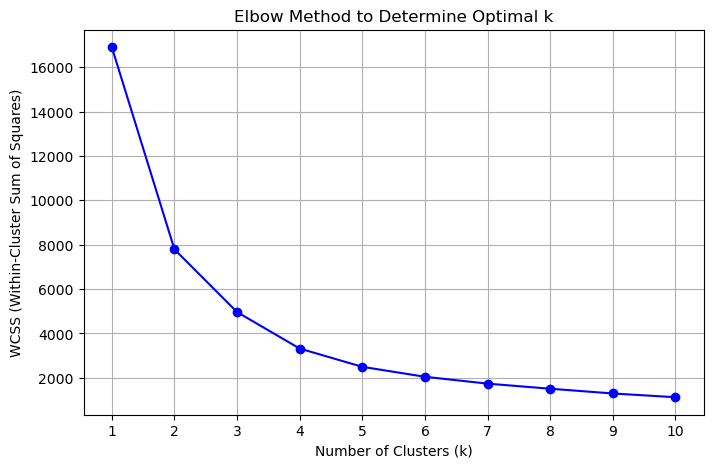

In [67]:
# Step 2: Determine the Optimal Number of Clusters Using the Elbow Method

# Initialize variables for the elbow method
wcss = []  # Within-cluster sum of squares

# Try different numbers of clusters (from 1 to 10) and compute WCSS
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_train[features_for_clustering])
    wcss.append(kmeans.inertia_)  # Inertia measures clustering tightness

# Step 3: Plot the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

Findings: 
1. The "elbow point" is where adding more clusters does not significantly reduce WCSS which is around 2 and 3.
2. Lets assume the optimal k be 3 for now.

## B. Using Silhouette Score method to validate the final Optimal k

In [200]:
import pandas as pd

# Reload the scaled training dataset
file_path = "C:/Users/samee/X_train_scaled.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,TotalServiceCost
0,1,0,1,-1.276682,1,0,-0.149881,1.0,0.0,0.0,0.0,1.0,-0.976299
1,0,0,0,-0.096089,1,0,-0.315125,1.0,0.0,0.0,1.0,0.0,-0.273851
2,0,1,0,0.555273,1,1,1.172071,0.0,1.0,1.0,0.0,0.0,1.029433
3,1,0,0,0.433143,1,0,0.048412,1.0,0.0,0.0,1.0,0.0,0.250997
4,1,0,0,-1.276682,1,1,-1.471834,0.0,1.0,0.0,0.0,1.0,-0.993971


Findings: Similar to Elbow method we choose only numerical features that is tenure, MonthlyCharges and TotalServiceCost and dropping all other features.

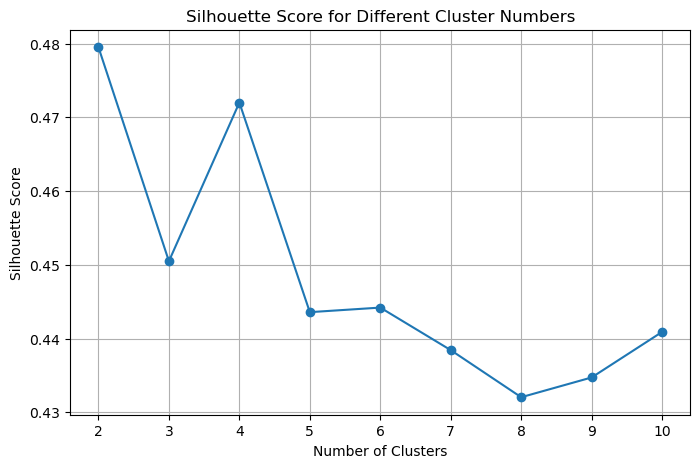

2

In [203]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Extract feature columns (excluding the cluster labels)
X = df.drop(columns=["gender","SeniorCitizen", "Dependents", "PhoneService","MultipleLines","InternetService_DSL","InternetService_Fiber optic","Contract_Month-to-month","Contract_One year","Contract_Two year"])

# Evaluate silhouette scores for different cluster numbers (e.g., from 2 to 10)
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores[k] = score

# Display the silhouette scores for different cluster values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.grid(True)
plt.show()

# Find the best number of clusters based on silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
best_k


Findings:  
1. A higher silhouette score means better clustering.
2. From the graph, when the number of clusters is 2 the Silhouette Score is highest. Therefore, the final Optimal k is 2.
   

# 5. Training K-Means Clustering Models:

## A. Performing K-means Clustering using the best number of clusters or Optimal k=2 to train the model.

In [221]:
# Perform K-Means clustering using the best number of clusters
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X)
df["cluster_label"] = labels


# Save the DataFrame to a CSV File
df.to_csv("X_train_scaled_clustered.csv", index=False)

df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,TotalServiceCost,cluster_label
0,1,0,1,-1.276682,1,0,-0.149881,1.0,0.0,0.0,0.0,1.0,-0.976299,0
1,0,0,0,-0.096089,1,0,-0.315125,1.0,0.0,0.0,1.0,0.0,-0.273851,0
2,0,1,0,0.555273,1,1,1.172071,0.0,1.0,1.0,0.0,0.0,1.029433,1
3,1,0,0,0.433143,1,0,0.048412,1.0,0.0,0.0,1.0,0.0,0.250997,0
4,1,0,0,-1.276682,1,1,-1.471834,0.0,1.0,0.0,0.0,1.0,-0.993971,0


Findings: 
1. We train the model using the optimal number of clusters i.e. k=2 and find the cluster labels for each data.
2. Once the cluster labels are assigned we add it to the existing scaled data and save it as X_train_scaled_clustered file.


## B. Save the Model for Future Use.

In [224]:
import joblib

# Save the trained model for future use
model_path = "C:/Users/samee/kmeans_model.pkl"
joblib.dump(kmeans_final, model_path)

# Display confirmation
model_path

'C:/Users/samee/kmeans_model.pkl'

Findings: We save the data locally to reuse the model for predicting new data without retraining.

# 6. Visualising and Labeling Clusters:

## A. Load the saved K-Means model and prepared dataset. Predict Cluster labels with the model.

In [251]:
# Re-import necessary libraries
import joblib
import pandas as pd

# Load the previously trained K-Means model
model_path = "C:/Users/samee/kmeans_model.pkl"
kmeans_final = joblib.load(model_path)

# Load dataset
df = pd.read_csv("X_train_scaled_clustered.csv")  

# Drop old cluster label if present
X = df.drop(columns=["cluster_label"], errors="ignore")

df["cluster_label"] = kmeans.fit_predict(X)

## B. Visualize the Clusters Using PCA

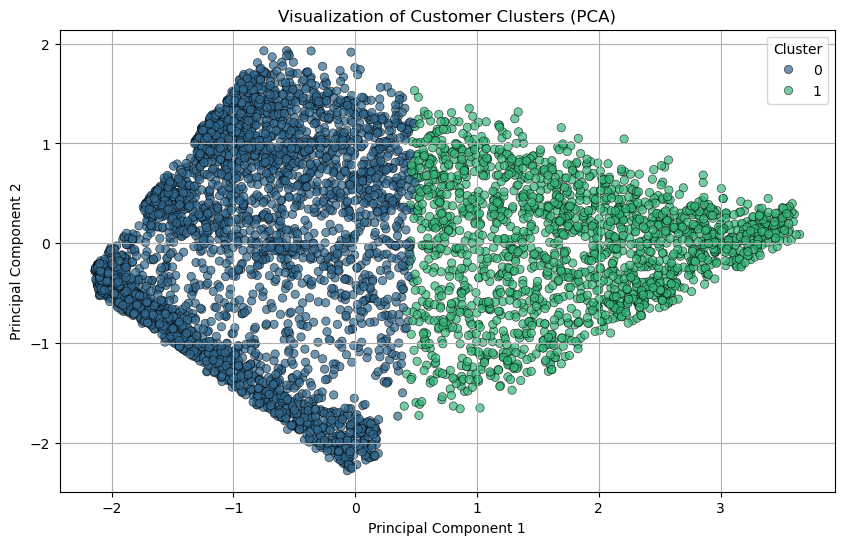

In [244]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_pca["cluster_label"] = df["cluster_label"]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df_pca["cluster_label"], palette="viridis", data=df_pca, alpha=0.7, edgecolor="k")
plt.title("Visualization of Customer Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Findings:
1. Features is reduced to 2 dimensions for visualization.
2. This gives a 2D visual of how your customers are segmented.


## C.  Analyze and Summarize Clusters

In [16]:
# Compute summary statistics for each cluster
cluster_summary = df.groupby("cluster_label").agg(
    avg_tenure=("tenure", "mean"),
    avg_monthly_charges=("MonthlyCharges", "mean"),
    avg_total_service_cost=("TotalServiceCost", "mean"),
    count=("cluster_label", "count")
).reset_index()

cluster_summary.head()

,cluster_label,avg_tenure,avg_monthly_charges,avg_total_service_cost,count
0,0,-0.498698,-0.419063,-0.622063,3752
1,1,0.994216,0.835455,1.240159,1882


Findings:
1. Average values per cluster is calculated to understand the characteristics.
2. This helps reveal patterns such as which group spends more or stays longer.


## D. Label the Clusters Based on Behavior

In [18]:
# Analyze cluster characteristics and suggest labels
cluster_labels = {}

for index, row in cluster_summary.iterrows():
    cluster_id = row["cluster_label"]
    avg_tenure = row["avg_tenure"]
    avg_monthly_charges = row["avg_monthly_charges"]
    avg_total_service_cost = row["avg_total_service_cost"]

    
    # Assign labels based on key characteristics
    if avg_tenure > 0 and avg_monthly_charges > 0:
        label = "High-Spending Long-Term Customers"
    elif avg_tenure < 0 and avg_monthly_charges < 0:
        label = "Budget-Conscious Short-Term Customers"
    elif avg_tenure > -0.2 and avg_monthly_charges > -0.2:
        label = "Mid-Tier Loyal Customers"
    else:
        label = "General Customers"
    
    cluster_labels[cluster_id] = label

# Convert cluster label suggestions into a DataFrame
cluster_labels_df = pd.DataFrame(cluster_labels.items(), columns=["cluster_label", "suggested_label"])

# Display clustered data with cluster label and suggested label name
display(cluster_labels_df.head())

,cluster_label,suggested_label
0,0.0,Budget-Conscious Short-Term Customers
1,1.0,High-Spending Long-Term Customers


Findings: 
1. Analysing the summary we assign meaningful labels to each cluster.
2. This step makes the clusters descriptive, understandable and business-friendly.
